Source: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)

In [1]:
!pip install arff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for arff: filename=arff-0.9-py3-none-any.whl size=4969 sha256=4911cd581008f944e6d5c7a050fc1da352d79048a8508f18c538959833b21b4a
  Stored in directory: /root/.cache/pip/wheels/8b/5b/6a/fdaf9e4b202a61789ddbc0341e3a0df5406d8e36edf08feaec
Successfully built arff


In [3]:
from scipy.io import arff
import pandas as pd
data = arff.loadarff('/content/dataset_31_credit-g.arff')
df = pd.DataFrame(data[0])
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
obj_cols=[column for column in df if df[column].dtype=='O']
obj_cols

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker',
 'class']

In [6]:
for column in obj_cols:
  df[column]=df[column].str.decode("utf-8")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [7]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
for column in obj_cols:
  print(f"column name: {column}\nvalues: {df[column].unique()}\n")

column name: checking_status
values: ['<0' '0<=X<200' 'no checking' '>=200']

column name: credit_history
values: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

column name: purpose
values: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

column name: savings_status
values: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']

column name: employment
values: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']

column name: personal_status
values: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

column name: other_parties
values: ['none' 'guarantor' 'co applicant']

column name: property_magnitude
values: ['real estate' 'life insurance' 'no known property' 'car']

column name: other_payment_plans
values: ['none' 'bank' 'stores']

column name: housing
values: ['own' 'for free' 'rent']

column name: job
values: ['skilled' 'un

In [9]:
df['own_telephone']=pd.get_dummies(df['own_telephone'], drop_first=True)
df['foreign_worker']=pd.get_dummies(df['foreign_worker'], drop_first=True)
df['class']=pd.get_dummies(df['class'], drop_first=True)
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,1,1,1
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,0,1,0
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,0,1,1
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,0,1,1
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,0,1,0


In [10]:
obj_cols=[column for column in df if df[column].dtype=='O']
for column in obj_cols:
  print(f"column name: {column}\nvalues: {df[column].unique()}\n")

column name: checking_status
values: ['<0' '0<=X<200' 'no checking' '>=200']

column name: credit_history
values: ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']

column name: purpose
values: ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']

column name: savings_status
values: ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']

column name: employment
values: ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']

column name: personal_status
values: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

column name: other_parties
values: ['none' 'guarantor' 'co applicant']

column name: property_magnitude
values: ['real estate' 'life insurance' 'no known property' 'car']

column name: other_payment_plans
values: ['none' 'bank' 'stores']

column name: housing
values: ['own' 'for free' 'rent']

column name: job
values: ['skilled' 'un

In [11]:
#possibly wrong
lower=df[df['checking_status']=='<0']
lower['checking_lower']=-9999
lower['checking_upper']=0

between=df[df['checking_status']=='0<=X<200']
between['checking_lower']=0
between['checking_upper']=199.99

none=df[df['checking_status']=='no checking']
none['checking_lower']=0
none['checking_upper']=0

above=df[df['checking_status']=='>=200']
above['checking_lower']=200
above['checking_upper']=9999

df=pd.concat([lower, between, none, above], ignore_index=True).drop('checking_status',axis=1)
df.head()

<ipython-input-11-24301ae2e9a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower['checking_lower']=-9999
<ipython-input-11-24301ae2e9a5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lower['checking_upper']=0
<ipython-input-11-24301ae2e9a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,checking_lower,checking_upper
0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,...,none,own,2.0,skilled,1.0,1,1,1,-9999,0.0
1,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,...,none,for free,1.0,skilled,2.0,0,1,1,-9999,0.0
2,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,...,none,for free,2.0,skilled,2.0,0,1,0,-9999,0.0
3,48.0,existing paid,business,4308.0,<100,<1,3.0,female div/dep/mar,none,4.0,...,none,rent,1.0,skilled,1.0,0,1,0,-9999,0.0
4,24.0,critical/other existing credit,new car,1199.0,<100,>=7,4.0,male single,none,4.0,...,none,own,2.0,unskilled resident,1.0,0,1,0,-9999,0.0


In [12]:
df.savings_status.unique()

array(['no known savings', '<100', '100<=X<500', '500<=X<1000', '>=1000'],
      dtype=object)

In [13]:
none=df[df['savings_status']=='no known savings']
none['savings_lower']=0
none['savings_upper']=0

lower100=df[df['savings_status']=='<100']
lower100['savings_lower']=0
lower100['savings_upper']=99.99

between1=df[df['savings_status']=='100<=X<500']
between1['savings_lower']=100
between1['savings_upper']=499.99

between2=df[df['savings_status']=='500<=X<1000']
between2['savings_lower']=500
between2['savings_upper']=999.99

higher=df[df['savings_status']=='500<=X<1000']
higher['savings_lower']=1000
higher['savings_upper']=9999

df=pd.concat([none, lower100, between1, between2, higher], ignore_index=True).drop('savings_status',axis=1)
print(df.savings_lower.value_counts(),df.savings_upper.value_counts())

0       786
100     103
500      63
1000     63
Name: savings_lower, dtype: int64 99.99      603
0.00       183
499.99     103
999.99      63
9999.00     63
Name: savings_upper, dtype: int64


<ipython-input-13-e35bcebb9d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  none['savings_lower']=0
<ipython-input-13-e35bcebb9d39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  none['savings_upper']=0
<ipython-input-13-e35bcebb9d39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [14]:
obj_cols=[column for column in df if df[column].dtype=='O']
for column in obj_cols:
  print(f"column name: {column}\nvalues: {df[column].unique()}\n")

column name: credit_history
values: ['critical/other existing credit' 'no credits/all paid' 'existing paid'
 'all paid' 'delayed previously']

column name: purpose
values: ['radio/tv' 'business' 'education' 'furniture/equipment' 'new car'
 'domestic appliance' 'used car' 'other' 'retraining' 'repairs']

column name: employment
values: ['>=7' '<1' '4<=X<7' '1<=X<4' 'unemployed']

column name: personal_status
values: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

column name: other_parties
values: ['none' 'co applicant' 'guarantor']

column name: property_magnitude
values: ['real estate' 'car' 'no known property' 'life insurance']

column name: other_payment_plans
values: ['none' 'bank' 'stores']

column name: housing
values: ['own' 'rent' 'for free']

column name: job
values: ['skilled' 'high qualif/self emp/mgmt' 'unskilled resident'
 'unemp/unskilled non res']



In [15]:
#column name: employment
#values: ['>=7' '<1' '4<=X<7' '1<=X<4' 'unemployed']

higher7=df[df['employment']=='>=7']
higher7['emp_lower']=7*12          # values in months!
higher7['emps_upper']=30*12

lower1=df[df['employment']=='<1']
lower1['emp_lower']=0
lower1['emps_upper']=0.99*1

between2=df[df['employment']=='4<=X<7']
between2['emp_lower']=4*12
between2['emps_upper']=0.99*7*12

between1=df[df['employment']=='1<=X<4']
between1['emp_lower']=1*12
between1['emps_upper']=0.99*4*12

unemployed=df[df['employment']=='1<=X<4']
unemployed['emp_lower']=0
unemployed['emps_upper']=0

df=pd.concat([higher7, lower1, between2, between1, unemployed], ignore_index=True).drop('employment',axis=1)
print(df.savings_lower.value_counts(),df.savings_upper.value_counts())

0       996
100     129
500      86
1000     86
Name: savings_lower, dtype: int64 99.99      773
0.00       223
499.99     129
999.99      86
9999.00     86
Name: savings_upper, dtype: int64


<ipython-input-15-c181e040be0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higher7['emp_lower']=7*12          # values in months!
<ipython-input-15-c181e040be0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  higher7['emps_upper']=30*12
<ipython-input-15-c181e040be0b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [16]:
obj_cols=[column for column in df if df[column].dtype=='O']
for column in obj_cols:
  print(f"column name: {column}\nvalues: {df[column].unique()}\n")

column name: credit_history
values: ['critical/other existing credit' 'existing paid' 'all paid'
 'delayed previously' 'no credits/all paid']

column name: purpose
values: ['radio/tv' 'education' 'new car' 'furniture/equipment' 'used car' 'other'
 'retraining' 'business' 'repairs' 'domestic appliance']

column name: personal_status
values: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

column name: other_parties
values: ['none' 'guarantor' 'co applicant']

column name: property_magnitude
values: ['real estate' 'no known property' 'car' 'life insurance']

column name: other_payment_plans
values: ['none' 'bank' 'stores']

column name: housing
values: ['own' 'for free' 'rent']

column name: job
values: ['skilled' 'high qualif/self emp/mgmt' 'unskilled resident'
 'unemp/unskilled non res']



In [17]:
df=pd.get_dummies(df, columns=['housing','other_parties','other_payment_plans'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   duration                    1297 non-null   float64
 1   credit_history              1297 non-null   object 
 2   purpose                     1297 non-null   object 
 3   credit_amount               1297 non-null   float64
 4   installment_commitment      1297 non-null   float64
 5   personal_status             1297 non-null   object 
 6   residence_since             1297 non-null   float64
 7   property_magnitude          1297 non-null   object 
 8   age                         1297 non-null   float64
 9   existing_credits            1297 non-null   float64
 10  job                         1297 non-null   object 
 11  num_dependents              1297 non-null   float64
 12  own_telephone               1297 non-null   uint8  
 13  foreign_worker              1297 

In [18]:
obj_cols=[column for column in df if df[column].dtype=='O']
for column in obj_cols:
  print(f"column name: {column}\nvalues: {df[column].unique()}\n")

column name: credit_history
values: ['critical/other existing credit' 'existing paid' 'all paid'
 'delayed previously' 'no credits/all paid']

column name: purpose
values: ['radio/tv' 'education' 'new car' 'furniture/equipment' 'used car' 'other'
 'retraining' 'business' 'repairs' 'domestic appliance']

column name: personal_status
values: ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']

column name: property_magnitude
values: ['real estate' 'no known property' 'car' 'life insurance']

column name: job
values: ['skilled' 'high qualif/self emp/mgmt' 'unskilled resident'
 'unemp/unskilled non res']



In [19]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [20]:
for jb in df.job.unique():
  print(jb,"average target value:" ,df[df.job==jb]['class'].mean(), "| sample size:", df[df.job==jb]['class'].shape[0] )

skilled average target value: 0.7027972027972028 | sample size: 858
high qualif/self emp/mgmt average target value: 0.6620689655172414 | sample size: 145
unskilled resident average target value: 0.7083333333333334 | sample size: 288
unemp/unskilled non res average target value: 0.6666666666666666 | sample size: 6


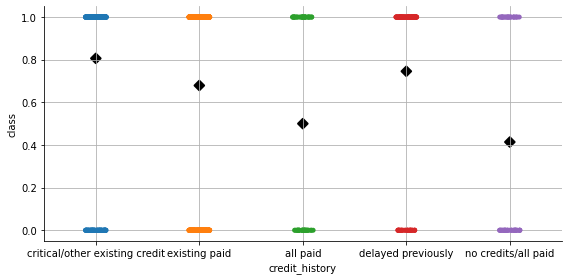

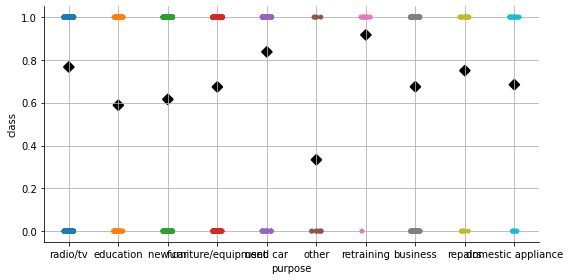

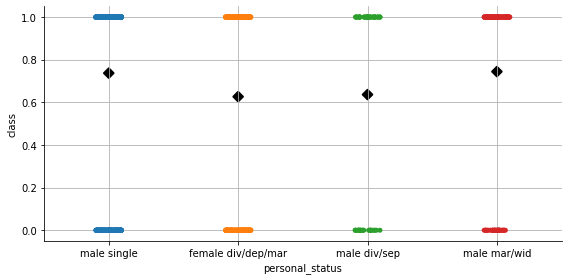

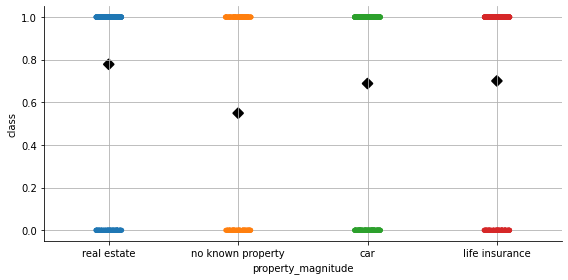

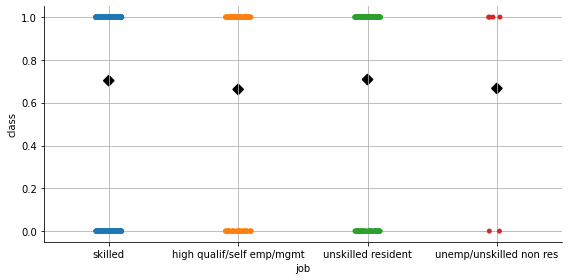

In [21]:
obj_cols=[column for column in df if df[column].dtype=='O']
for col in obj_cols:
  g = sns.catplot(data=df, x=col, y="class", height=4, aspect=2)
  ax = g.ax
  sns.pointplot(data=df, x=col, y="class", estimator=np.mean,join=False, ci=None, markers=['D'], color='black', size=20, zorder=3, ax=ax)
  sns.despine(right=True, top=True)
  plt.grid()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory.

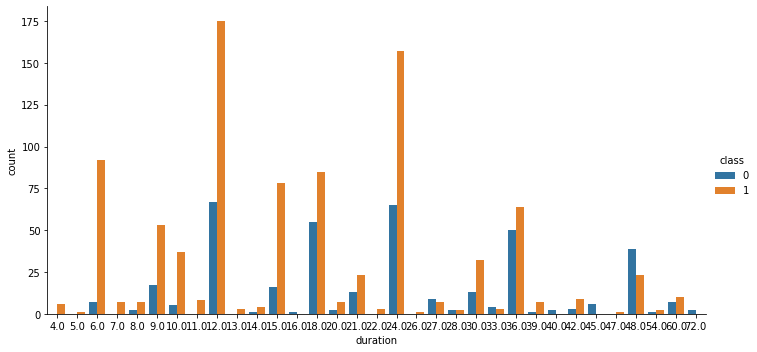

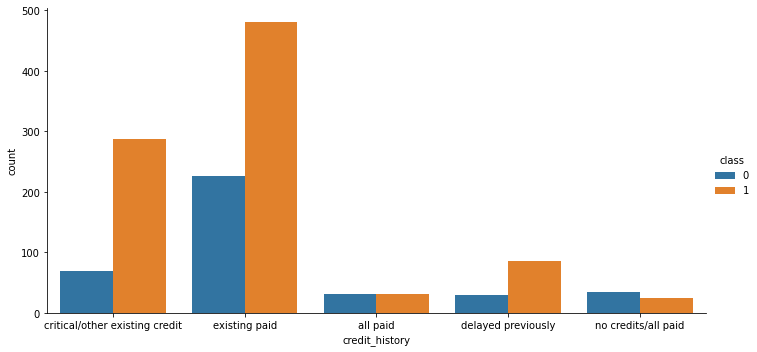

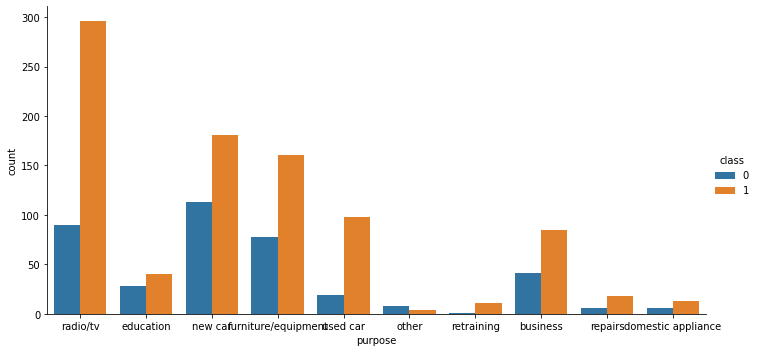

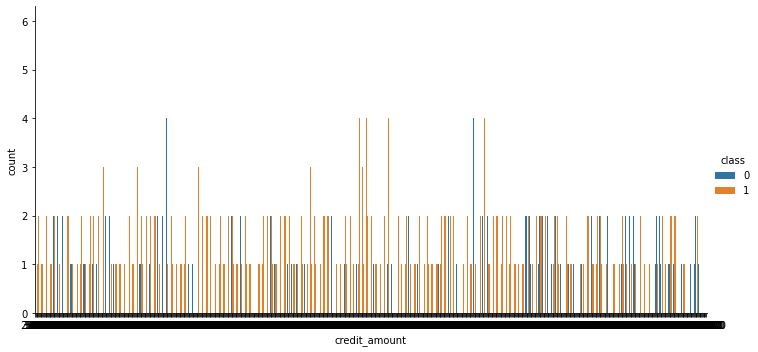

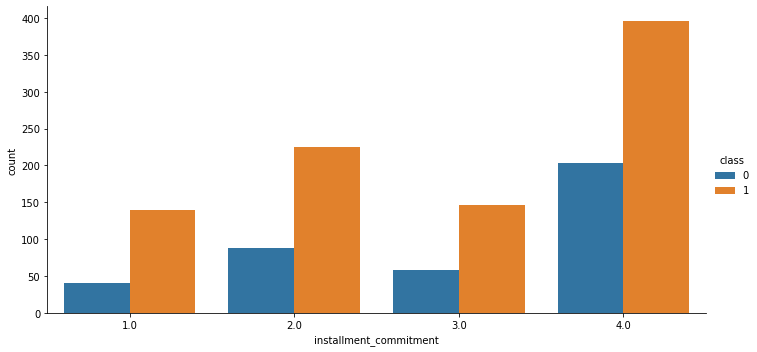

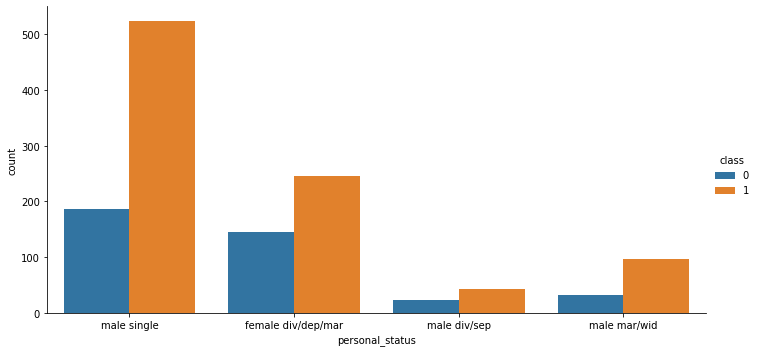

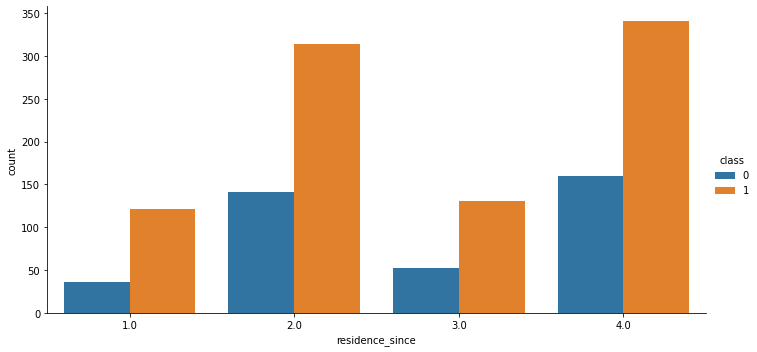

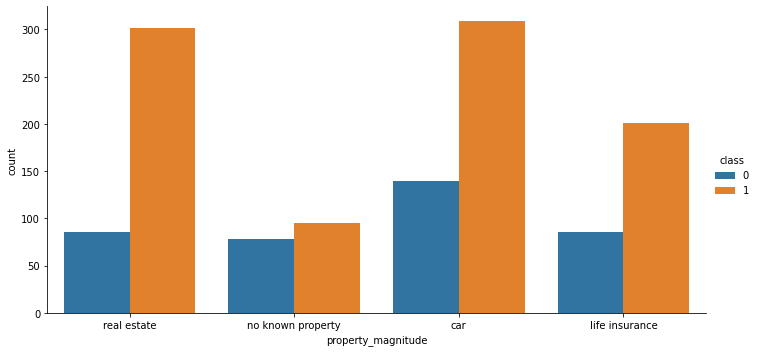

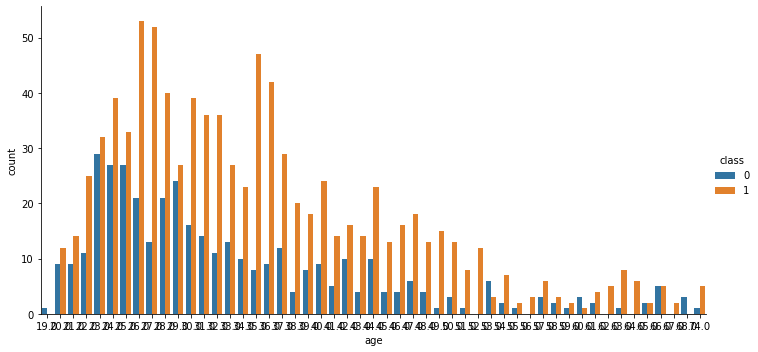

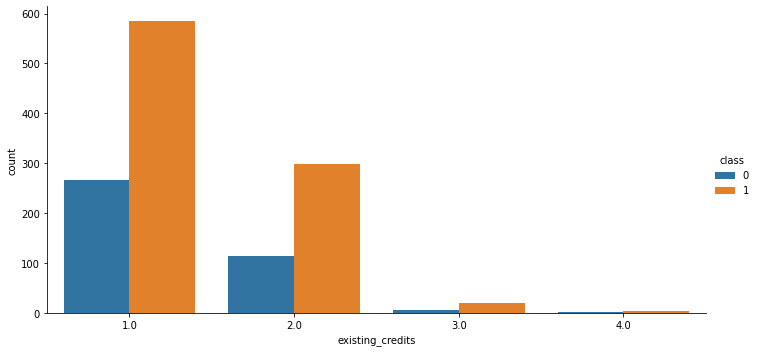

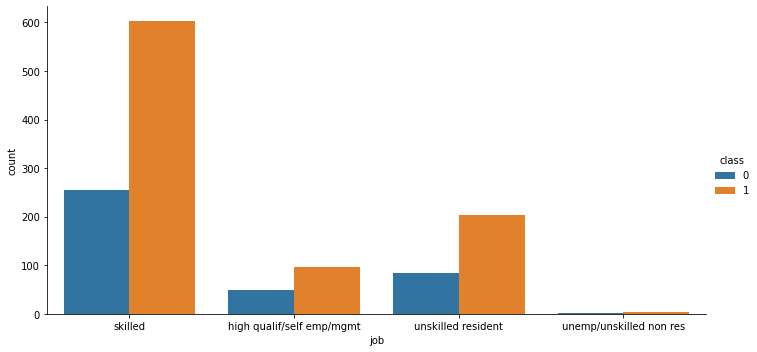

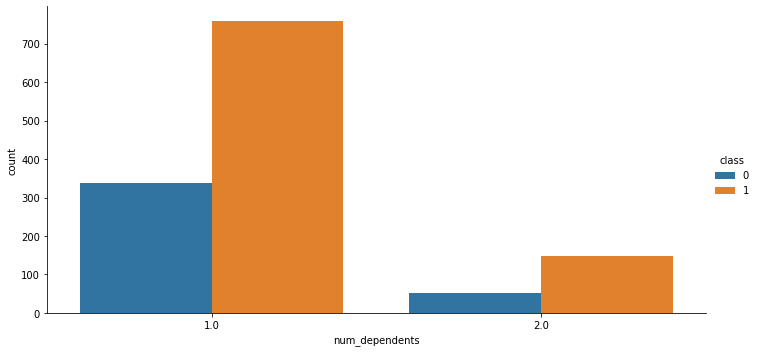

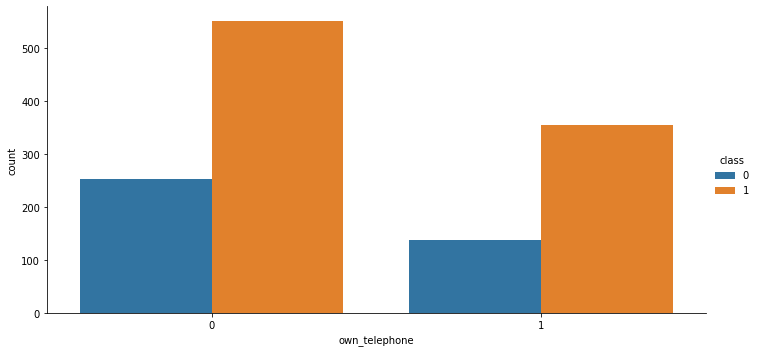

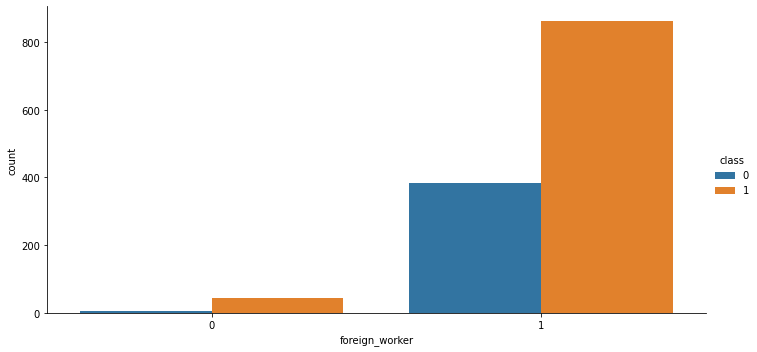

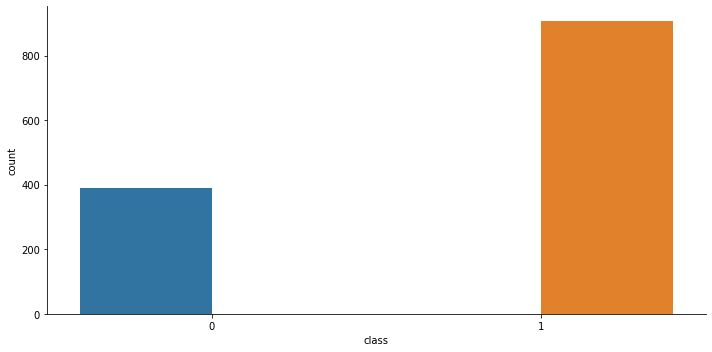

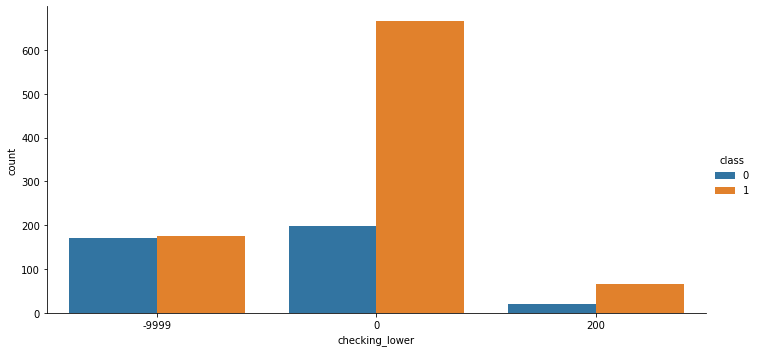

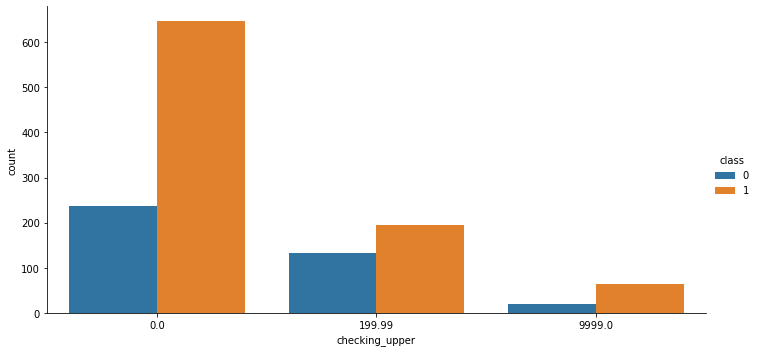

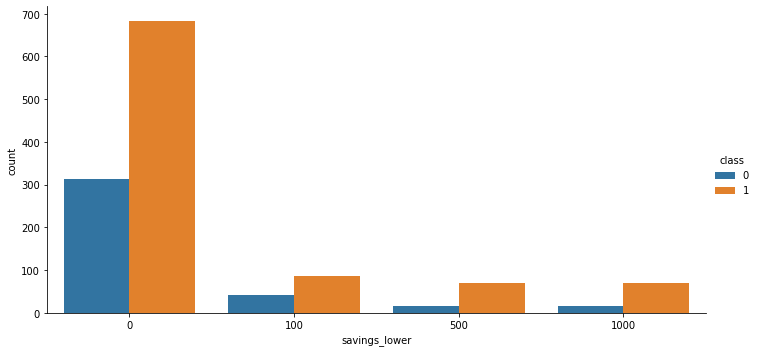

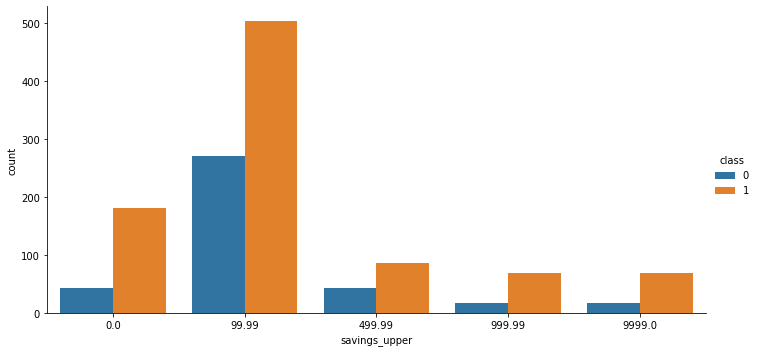

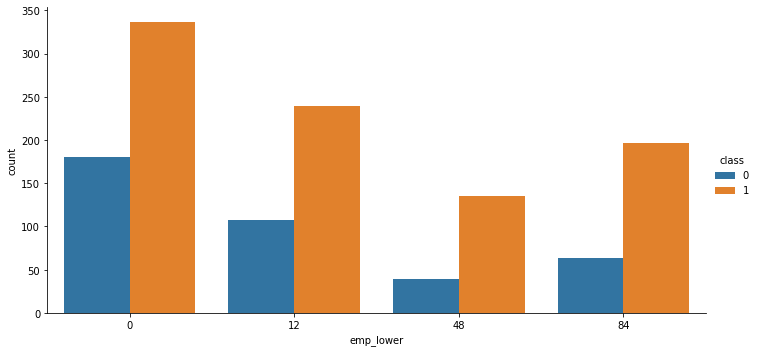

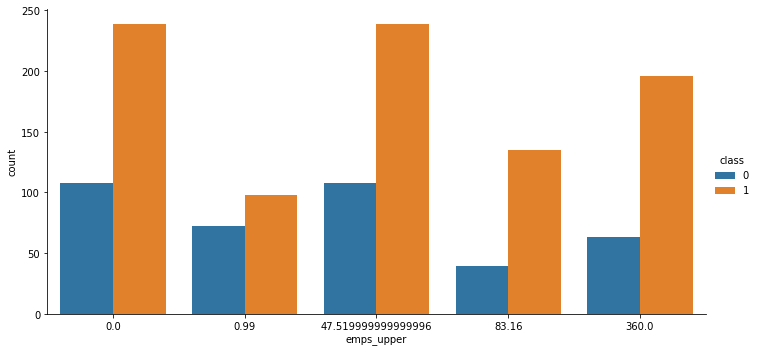

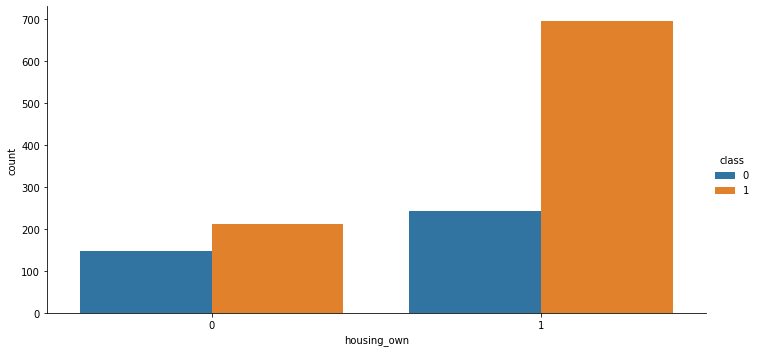

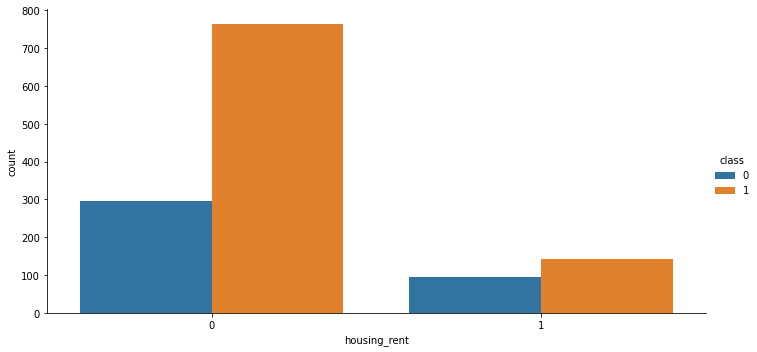

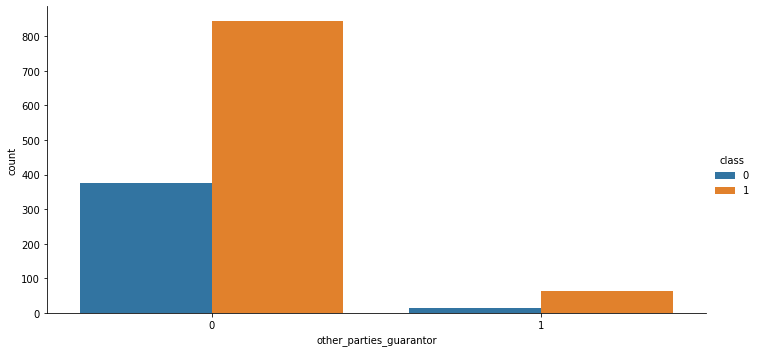

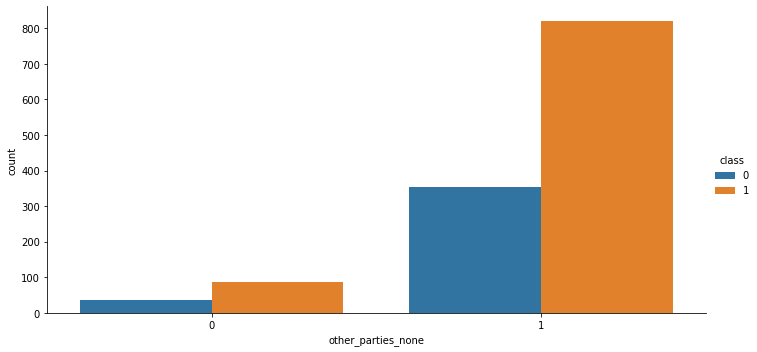

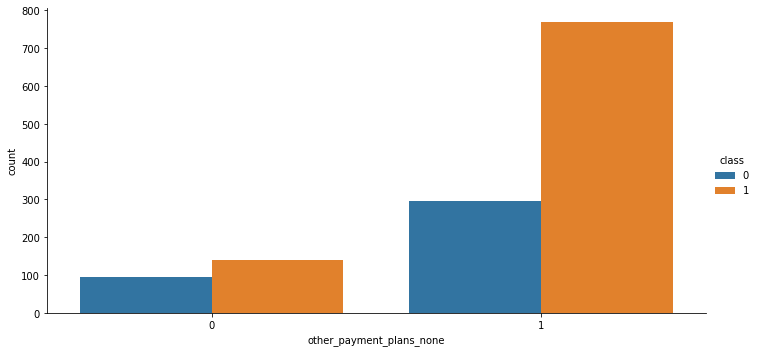

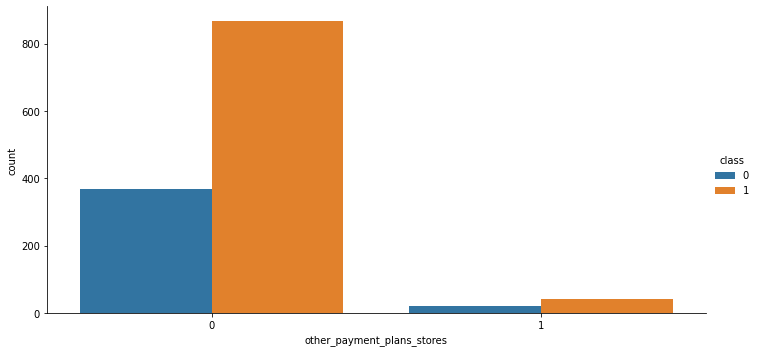

In [22]:
obj_cols=[column for column in df if df[column].dtype=='O']
for column in df:
  sns.catplot(x=column,hue='class',data=df,kind="count",aspect=2)

In [23]:
df['class'].value_counts()

1    907
0    390
Name: class, dtype: int64

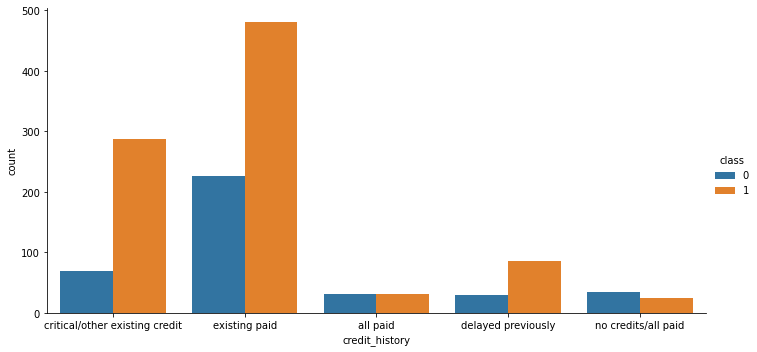

In [24]:
sns.catplot(x=obj_cols[0],hue='class',data=df,kind="count",aspect=2)

people assigned to "critical account/ other credits existing (not at this bank)" tend to be very likely to get a credit - this is really weird

same thing about people who had delayed their payments in past

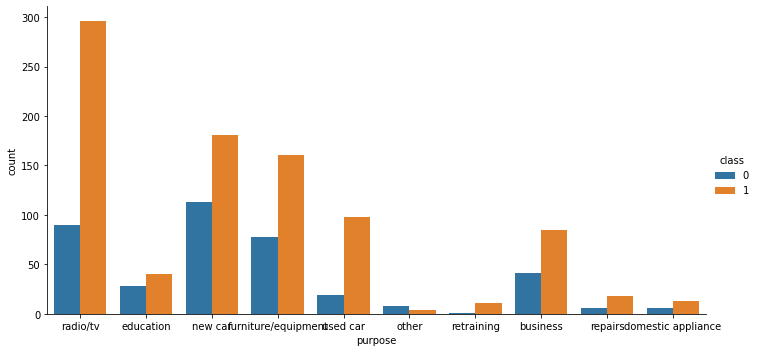

In [25]:
sns.catplot(x=obj_cols[1],hue='class',data=df,kind="count",aspect=2)

Will try to replace this category with other vs not other to reduce increasing the dimensionality that one hot encoding would cause

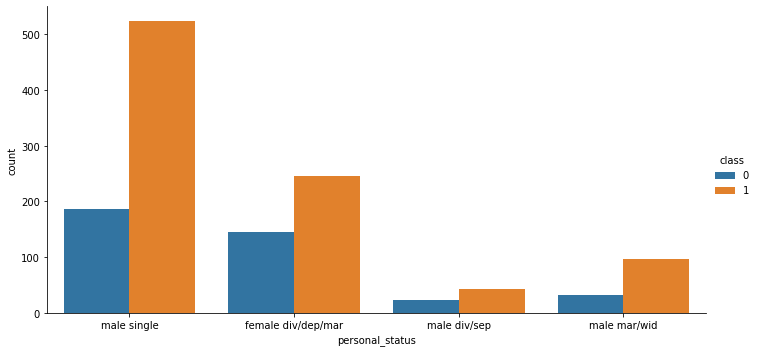

In [26]:
sns.catplot(x=obj_cols[2],hue='class',data=df,kind="count",aspect=2)

This feature is clearly missing some of the categories: what if single female comes to the bank? Going to drop this column

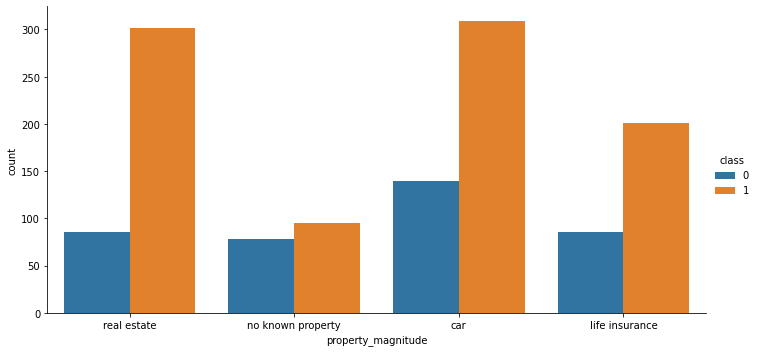

In [27]:
sns.catplot(x=obj_cols[3],hue='class',data=df,kind="count",aspect=2)

Will try to do property vs no known property instead

skilled average target value: 0.7027972027972028 | sample size: 858
high qualif/self emp/mgmt average target value: 0.6620689655172414 | sample size: 145
unskilled resident average target value: 0.7083333333333334 | sample size: 288
unemp/unskilled non res average target value: 0.6666666666666666 | sample size: 6


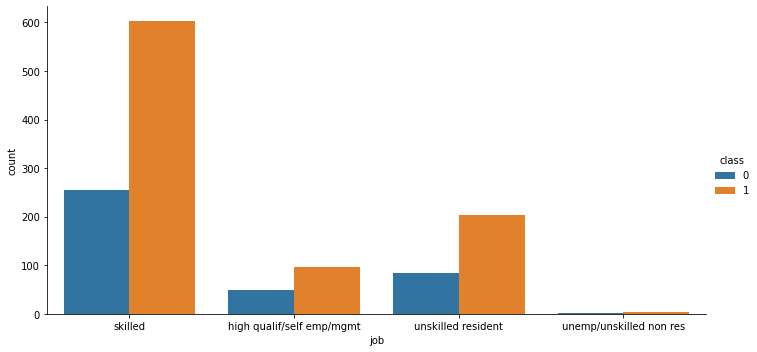

In [28]:
sns.catplot(x=obj_cols[4],hue='class',data=df,kind="count",aspect=2)
for jb in df.job.unique():
  print(jb,"average target value:" ,df[df.job==jb]['class'].mean(), "| sample size:", df[df.job==jb]['class'].shape[0] )


Only 6 people with unemp/unskilled non res category is too few. Also it can be seen that no matter what category person has, the expected class value is very similar in this dataset. Same thing if you combine all skilled vs unskilled samples. Going to drop this column

In [29]:
def purpose_convert(x):
    if x=='other':
      x=1
    else:
      x=0
    return x
df['purpose'] = df['purpose'].apply(lambda x: purpose_convert(x))
df.purpose.value_counts()

0    1285
1      12
Name: purpose, dtype: int64

In [30]:
def credhist_convert(x):
    if 'all paid' in x:
      x=1
    else:
      x=0
    return x
df['credit_history'] = df['credit_history'].apply(lambda x: credhist_convert(x))
df.credit_history.value_counts()

0    1177
1     120
Name: credit_history, dtype: int64

In [31]:
def property_convert(x):
    if x=='no known property':
      x=0
    else:
      x=1
    return x
df['property_magnitude'] = df['property_magnitude'].apply(lambda x: property_convert(x))
df.property_magnitude.value_counts()

1    1124
0     173
Name: property_magnitude, dtype: int64

In [32]:
df=df.drop('personal_status',axis=1)
df=df.drop('job',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   duration                    1297 non-null   float64
 1   credit_history              1297 non-null   int64  
 2   purpose                     1297 non-null   int64  
 3   credit_amount               1297 non-null   float64
 4   installment_commitment      1297 non-null   float64
 5   residence_since             1297 non-null   float64
 6   property_magnitude          1297 non-null   int64  
 7   age                         1297 non-null   float64
 8   existing_credits            1297 non-null   float64
 9   num_dependents              1297 non-null   float64
 10  own_telephone               1297 non-null   uint8  
 11  foreign_worker              1297 non-null   uint8  
 12  class                       1297 non-null   uint8  
 13  checking_lower              1297 

In [34]:
df.head()

,duration,credit_history,purpose,credit_amount,installment_commitment,residence_since,property_magnitude,age,existing_credits,num_dependents,...,savings_lower,savings_upper,emp_lower,emps_upper,housing_own,housing_rent,other_parties_guarantor,other_parties_none,other_payment_plans_none,other_payment_plans_stores
0,6.0,0.723874,0.702724,1169.0,4.0,4.0,1,67.0,2.0,1.0,...,0,0.0,84,360.0,1,0,0,1,1,0
1,36.0,0.723874,0.702724,1977.0,4.0,4.0,0,40.0,1.0,1.0,...,0,0.0,84,360.0,1,0,0,1,1,0
2,24.0,0.723874,0.702724,915.0,4.0,2.0,1,29.0,1.0,1.0,...,0,0.0,84,360.0,1,0,0,1,0,0
3,12.0,0.723874,0.702724,1262.0,2.0,4.0,1,49.0,1.0,1.0,...,0,0.0,84,360.0,1,0,0,1,1,0
4,30.0,0.723874,0.702724,6350.0,4.0,4.0,1,31.0,1.0,1.0,...,0,0.0,84,360.0,1,0,0,1,1,0


In [35]:
df.shape

(1297, 25)

In [36]:
X=df.drop('class',axis=1)
y=df['class']

In [37]:
num_feats=10

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [39]:
def cor_selector(X, y,num_feats):
  cor_list = []
  feature_name = X.columns.tolist()
  # calculate the correlation with y for each feature
  for i in X.columns.tolist():
    cor = np.corrcoef(X[i], y)[0, 1]
    cor_list.append(cor)
  # replace NaN with 0
  cor_list = [0 if np.isnan(i) else i for i in cor_list]
  # feature name
  cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
  # feature selection? 0 for not select, 1 for select
  cor_support = [True if i in cor_feature else False for i in feature_name]
  return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,num_feats)
print(str(len(cor_feature)), 'selected features')

10 selected features


In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=0)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

10 selected features


In [41]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)
embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

9 selected features


In [43]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
num_feats=df.shape[1]-1
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

10 selected features


In [44]:
num_feats

24

In [46]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier
num_feats=df.shape[1]-1
lgbc=model2=xgb.XGBClassifier(colsample_bytree= 0.9, gamma= 0.7, learning_rate= 0.8, max_depth= 12, min_child_weight= 3, n_estimators= 200, subsample= 1)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

8 selected features


In [47]:
X=df[(set(chi_feature + cor_feature + rfe_feature + embeded_lr_feature + embeded_lgb_feature))]

In [48]:
chi_feature, cor_feature, rfe_feature, embeded_lr_feature, embeded_lgb_feature

(['duration',
  'credit_amount',
  'checking_lower',
  'savings_lower',
  'savings_upper',
  'emp_lower',
  'emps_upper',
  'housing_own',
  'housing_rent',
  'other_parties_guarantor'],
 ['age',
  'emp_lower',
  'housing_rent',
  'other_payment_plans_none',
  'property_magnitude',
  'housing_own',
  'credit_history',
  'credit_amount',
  'duration',
  'checking_lower'],
 ['duration',
  'credit_history',
  'purpose',
  'credit_amount',
  'installment_commitment',
  'foreign_worker',
  'checking_lower',
  'emp_lower',
  'housing_rent',
  'other_parties_guarantor'],
 ['duration',
  'credit_history',
  'purpose',
  'credit_amount',
  'installment_commitment',
  'foreign_worker',
  'checking_lower',
  'emp_lower',
  'other_parties_guarantor'],
 ['credit_history',
  'property_magnitude',
  'checking_lower',
  'checking_upper',
  'housing_own',
  'other_parties_guarantor',
  'other_parties_none',
  'other_payment_plans_none'])

In [49]:
X=df[embeded_lgb_feature]

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=42,stratify=y,shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(972, 8) (972,)
(325, 8) (325,)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('pca', PCA(n_components = X_train.shape[1])), ('std', StandardScaler()), ('Logistic Regression', LogisticRegression())], verbose = True)

In [53]:
pipe.fit(X_train, y_train)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.0s


Pipeline(steps=[('pca', PCA(n_components=8)), ('std', StandardScaler()),
                ('Logistic Regression', LogisticRegression())],
         verbose=True)

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
predictions=pipe.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7169230769230769
[[ 27  71]
 [ 21 206]]
              precision    recall  f1-score   support

           0       0.56      0.28      0.37        98
           1       0.74      0.91      0.82       227

    accuracy                           0.72       325
   macro avg       0.65      0.59      0.59       325
weighted avg       0.69      0.72      0.68       325



In [55]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=6, shuffle=True, random_state=5)
cv_scores = cross_val_score(pipe, X, y, cv=kf)
print(cv_scores)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.0s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.0s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.0s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline]  (step 3 of 3) Processing Logistic Regression, total=   0.0s
[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[P

In [56]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=42)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.723077


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [58]:
y_train.value_counts()

1    680
0    292
Name: class, dtype: int64

In [59]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='precision')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.737206 (0.014630)
LDA: 0.744491 (0.008939)
KNN: 0.735321 (0.017813)
CART: 0.747342 (0.020491)
NB: 0.740488 (0.018344)
SVM: 0.741834 (0.025065)


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
from sklearn.preprocessing import normalize
X_scaled=normalize(X_scaled)

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y, test_size=0.25,random_state=42,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(972, 8) (972,)
(325, 8) (325,)


In [71]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.703734 (0.022853)
LDA: 0.695508 (0.043961)
KNN: 0.683158 (0.032846)
CART: 0.718115 (0.021587)
NB: 0.660488 (0.045022)
SVM: 0.711961 (0.028014)


In [ ]:
np.linspace(1000,10000,19)

array([ 2000,  4000,  6000,  8000, 10000])

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.0001, 0.001, 0.01],
              'kernel': ['poly','rbf','sigmoid','linear']}   
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test)
# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .............C=0.0001, kernel=poly;, score=0.697 total time=   0.0s
[CV 2/5] END .............C=0.0001, kernel=poly;, score=0.697 total time=   0.0s
[CV 3/5] END .............C=0.0001, kernel=poly;, score=0.701 total time=   0.1s
[CV 4/5] END .............C=0.0001, kernel=poly;, score=0.701 total time=   0.0s
[CV 5/5] END .............C=0.0001, kernel=poly;, score=0.701 total time=   0.0s
[CV 1/5] END ..............C=0.0001, kernel=rbf;, score=0.697 total time=   0.1s
[CV 2/5] END ..............C=0.0001, kernel=rbf;, score=0.697 total time=   0.1s
[CV 3/5] END ..............C=0.0001, kernel=rbf;, score=0.701 total time=   0.1s
[CV 4/5] END ..............C=0.0001, kernel=rbf;, score=0.701 total time=   0.1s
[CV 5/5] END ..............C=0.0001, kernel=rbf;, score=0.701 total time=   0.1s
[CV 1/5] END ..........C=0.0001, kernel=sigmoid;, score=0.697 total time=   0.1s
[CV 2/5] END ..........C=0.0001, kernel=sigmoid;

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model=DecisionTreeClassifier(max_depth=70, min_samples_leaf=2, random_state=42, class_weight={0: 1, 1: 100})
model.fit(X_train,y_train)
preds=model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.79      0.62      0.70        98
           1       0.85      0.93      0.89       227

    accuracy                           0.84       325
   macro avg       0.82      0.78      0.79       325
weighted avg       0.83      0.84      0.83       325



In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
model=DecisionTreeClassifier(max_depth=500, min_samples_leaf=5, random_state=42)
balance = [{0:8,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}, {0:1,1:200}]
param_grid = dict(class_weight=balance)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
grid.fit(X_train,y_train)
print("Best: %f using %s" % (grid.best_score_, grid.best_params_))
# report all configurations
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
dt_best = grid.best_estimator_
print(classification_report(y_test, dt_best.predict(X_test)))

Best: 0.797028 using {'class_weight': {0: 1, 1: 200}}
0.777109 (0.047124) with: {'class_weight': {0: 8, 1: 1}}
0.773378 (0.049226) with: {'class_weight': {0: 10, 1: 1}}
0.785067 (0.042447) with: {'class_weight': {0: 1, 1: 1}}
0.787584 (0.039394) with: {'class_weight': {0: 1, 1: 10}}
0.796682 (0.039518) with: {'class_weight': {0: 1, 1: 100}}
0.797028 (0.039295) with: {'class_weight': {0: 1, 1: 200}}
              precision    recall  f1-score   support

           0       0.76      0.33      0.46        98
           1       0.77      0.96      0.85       227

    accuracy                           0.77       325
   macro avg       0.76      0.64      0.65       325
weighted avg       0.77      0.77      0.73       325



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [70,100, 90, 110],
    'min_samples_leaf': [2,3,4, 5],
    'criterion': ["gini"]
}
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision")
grid_search.fit(X_train, y_train)
dt_best = grid_search.best_estimator_
print(classification_report(y_test, dt_best.predict(X_test)))

Fitting 4 folds for each of 16 candidates, totalling 64 fits
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        98
           1       0.89      0.87      0.88       227

    accuracy                           0.83       325
   macro avg       0.80      0.81      0.81       325
weighted avg       0.84      0.83      0.83       325



In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=70, min_samples_leaf=2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
eval_set=[(X_test, y_test)]
PARAMETERS = {'learning_rate' : [0.55,0.6,0.65,0.7,0.75,0.8],
          'max_depth' : [ 12, 15, 16, 17, 18, 20, 22, 25],
          'min_child_weight' : [ 1, 3, 5, 7 ],
          'gamma': [ 0.4, 0.45, 0.5 , 0.6, 0.7 ],
          'colsample_bytree' : [ 0.7, 0.8, 0.9 , 1 ],
          'n_estimators' : [ 200, 300, 700],
          'subsample': [1]
          }


model = xgb.XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=3,scoring="accuracy")
model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)

print(model_gs.best_params_)

In [ ]:
model_gs.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)

Streaming output truncated to the last 5000 lines.
Exception ignored in: <function Booster.__del__ at 0x7f2fc8dc7440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
Exception ignored in: <function Booster.__del__ at 0x7f2fc8dc7440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
Exception ignored in: <function Booster.__del__ at 0x7f2fc8dc7440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'
Exception ignored in: <function Booster.__del__ at 0x7f2fc8dc7440>
Traceback (most recent call last):
  File "/u

KeyboardInterrupt: ignored

In [ ]:
eval_set=[(X_test, y_test)]
model2=xgb.XGBClassifier(colsample_bytree= 0.9, gamma= 0.7, learning_rate= 0.8, max_depth= 12, min_child_weight= 3, n_estimators= 200, subsample= 1)
model2.fit(X_train,y_train,early_stopping_rounds=10, eval_metric="error",eval_set=eval_set,verbose=0)

XGBClassifier(colsample_bytree=0.9, gamma=0.7, learning_rate=0.8, max_depth=12,
              min_child_weight=3, n_estimators=200)

In [ ]:
predictions=model2.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7794871794871795
[[ 68  51]
 [ 35 236]]
              precision    recall  f1-score   support

           0       0.66      0.57      0.61       119
           1       0.82      0.87      0.85       271

    accuracy                           0.78       390
   macro avg       0.74      0.72      0.73       390
weighted avg       0.77      0.78      0.77       390



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost
classifier = xgboost.XGBClassifier()

In [ ]:
#XGBClassifier(gamma=0.4, learning_rate=0.55, max_depth=15, n_estimators=200)
params = {'learning_rate' : [0.55,0.6,0.65,0.7,0.75,0.8],
          'max_depth' : [ 12, 15, 16, 17, 18, 20, 22, 25],
          'min_child_weight' : [ 1, 3, 5, 7 ],
          'gamma': [ 0.4, 0.45, 0.5 , 0.6, 0.7 ],
          'colsample_bytree' : [ 0.7, 0.8, 0.9 , 1 ],
          'n_estimators' : [ 200, 300, 700],
          'subsample': [1]
          }

In [ ]:
rs_model=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='recall',n_jobs=-1,cv=5,verbose=3)
rs_model.fit(X_train,y_train,eval_set=eval_set,eval_metric='aucpr')
rs_model.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[0]	validation_0-aucpr:0.893146
[1]	validation_0-aucpr:0.900875
[2]	validation_0-aucpr:0.917656
[3]	validation_0-aucpr:0.91017
[4]	validation_0-aucpr:0.908547
[5]	validation_0-aucpr:0.911883
[6]	validation_0-aucpr:0.913463
[7]	validation_0-aucpr:0.913014
[8]	validation_0-aucpr:0.916525
[9]	validation_0-aucpr:0.916272
[10]	validation_0-aucpr:0.918705
[11]	validation_0-aucpr:0.921016
[12]	validation_0-aucpr:0.919887
[13]	validation_0-aucpr:0.922151
[14]	validation_0-aucpr:0.925623
[15]	validation_0-aucpr:0.925748
[16]	validation_0-aucpr:0.927078
[17]	validation_0-aucpr:0.926987
[18]	validation_0-aucpr:0.925791
[19]	validation_0-aucpr:0.926029
[20]	validation_0-aucpr:0.928517
[21]	validation_0-aucpr:0.925109
[22]	validation_0-aucpr:0.926106
[23]	validation_0-aucpr:0.929073
[24]	validation_0-aucpr:0.92788
[25]	validation_0-aucpr:0.9264
[26]	validation_0-aucpr:0.926237
[27]	validation_0-aucpr:0.925978
[28]	validation_0-aucpr:0.9259

XGBClassifier(colsample_bytree=0.9, gamma=0.7, learning_rate=0.8, max_depth=12,
              min_child_weight=5, n_estimators=700)

In [ ]:
predictions=rs_model.best_estimator_.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8205128205128205
[[ 80  39]
 [ 31 240]]
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       119
           1       0.86      0.89      0.87       271

    accuracy                           0.82       390
   macro avg       0.79      0.78      0.78       390
weighted avg       0.82      0.82      0.82       390



In [ ]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:
X=X.to_numpy()
y=y.to_numpy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y=y.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X_scaled, y, test_size=0.33)
# Build the model
model = Sequential()
model.add(Dense(10, input_shape=(17,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(2, activation='sigmoid', name='output'))
# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
print('Neural Network Model Summary: ')
print(model.summary())
# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=100)
# Test on unseen data
results = model.evaluate(test_x, test_y)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary: 
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 10)                180       
                                                                 
 fc2 (Dense)                 (None, 10)                110       
                                                                 
 output (Dense)              (None, 2)                 22        
                                                                 
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
174/174 - 1s - loss: 0.6244 - accuracy: 0.6970 - 816ms/epoch - 5ms/step
Epoch 2/100
174/174 - 0s - loss: 0.5723 - accuracy: 0.7028 - 189ms/epoch - 1ms/step
Epoch 3/100
174/174 - 0s - loss: 0.5382 - accuracy: 0.7108 - 198ms/epoch - 1ms/step
Epoch 4/100
174/174 - 0s - loss:

In [ ]:
y_pred=[np.argmax(y_pred) for y_pred in model.predict(test_x)]
y_test=[np.argmax(y) for y in test_y]
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

14/14 [==============================] - 0s 1ms/step
0.7692307692307693
[[ 65  38]
 [ 61 265]]
              precision    recall  f1-score   support

           0       0.52      0.63      0.57       103
           1       0.87      0.81      0.84       326

    accuracy                           0.77       429
   macro avg       0.70      0.72      0.71       429
weighted avg       0.79      0.77      0.78       429

